# 0.Preliminary



1. Two popular libararies are used to analyze data.
2. One is statsmodels for conventional statistic way to analyze data. [Here](https://www.statsmodels.org/devel/api.html) demonstrates all statistic model you may adopt for data analysis.
3. Another one is sklearn for so called AI/machine learning way to analyze data. [Here](https://scikit-learn.org/stable/index.html) shows all 
models up to date you may heard.
4. This course will provide a overview of using conventional statistic way & machine learning way to analyze data.
5. You can also find something interesting document and dataset as following
> * data set https://www.kaggle.com/datasets
> * notebook of others https://www.kaggle.com/notebooks
> * documents https://www.kaggle.com/learn/overview


## Load Google Drive

In [ ]:
import sys
import os
from PIL import Image
import shutil

# 如果你更改了存放位置，請更改下面的位置
# root directory
GOOGLE_PROJECT_PATH="2022_python_ai/"

# chapter directory
GOOGLE_LESSION_PATH="05_數據統計分析/"

#####################################
GOOGLE_HOME_PATH="My Drive/"
GOOGLE_DEFAULT_PATH=f"/content/drive/"
GOOGLE_TMP_NAME="My Drive/course_python_tmp/"

GOOGLE_MY_PATH = GOOGLE_DEFAULT_PATH+GOOGLE_HOME_PATH+GOOGLE_PROJECT_PATH+GOOGLE_LESSION_PATH
MY_PATH_TMP = None



# its win32, maybe there is win64 too?
is_windows = sys.platform.startswith('win')

if is_windows:
    if os.path.exists('./tmp'):
      shutil.rmtree('./tmp')        
    pass
    os.makedirs('./tmp')
    MY_PATH_TMP = "./tmp/"
else:
    from google.colab import drive
    from PIL import Image

    # 1. mount google drive
    drive.mount(GOOGLE_DEFAULT_PATH, force_remount=True)
    os.chdir(GOOGLE_MY_PATH) #change to this path
    Curr_Path=os.getcwd()
    print(Curr_Path)

    MY_PATH_TMP = GOOGLE_DEFAULT_PATH+GOOGLE_TMP_NAME

    # 2. create tmp
    if not os.path.exists(MY_PATH_TMP):
        os.makedirs(MY_PATH_TMP)
    pass

pass

Curr_Path=os.getcwd()
print(Curr_Path)

Mounted at /content/drive/
/content/drive/My Drive/2022_python_ai/05_數據統計分析
/content/drive/My Drive/2022_python_ai/05_數據統計分析


# 2.Clustering (30mins)

Clustering of unlabeled data can be performed with Clustering algorithms.

Conventional Clustering algorithms are list [here](https://scikit-learn.org/stable/modules/clustering.html#k-means)

2019高普考-資訊管理概論

http://goldensun.get.com.tw/file/Paper/KP/600.pdf

二、資料探勘（data mining）乃是由資料庫、資料倉儲或其他資料儲存設備內的大量資料中，找出隱含的、未知的、可能有用的或是有趣的樣式（pattern）之過程，重要的技術包括：關聯規則
（association  rules）、分類（classification）、分群（clustering）等。請回答下列有關資料探勘的問題：

(一)請說明「分類」與「分群」的差異。（10分）

(二)請舉例說明「分類」在政府部門的可能應用。（5分） 

(三)請舉例說明「分群」在政府部門的可能應用。（5分）

答：

(一)

分群(clustering)為將資料分群，將相同特性之資料(如產品、顧客)分成同一群；

而分類(classification)依照特定條件將資料分類，可判斷資料庫中之資料是否隱含此族群之特性。

兩者最主要之差別在於，分群並不會將使用者區分之條件事先設定(分群在訓練時不需有Y值)，而是根據演算法動態找出分群之條件；

而分類必須事先將區分條件設定(分群在訓練時需有Y值)，由演算法找出各群是否滿足欲尋求之條件(找出Y=AX+b關係式)。

(二)分類(classification)：樣本有具體的Y，演算法須找出X->Y的關係式。(e.g., 可能犯罪/不太可能犯罪)，例如透過犯罪資料庫，找出Y=有犯罪/無犯罪，X為不同學歷、家庭狀況、年齡層、職業、收入條件下，建立好模型 Y= AX + b後，即可透過X求出潛在可能需要輔導的犯罪或詐欺行為人。

(三)分群(clustering)：樣本沒有Y，需透過演算法找出Y，以及X->Y的關係式。(你必須根據組織的需求，告訴演算法你要分幾群)例如社會局人民團體科有三個科員，為了平均分配業務，將民眾資料區分為三個群組，政府可依照群組內相同特性提供量身訂做之服務。如民眾e管家等服務性質網站，若有新會員加入，亦可自動分入適當群組，讓三個科員各自提供其適合之服務項目。



## 2.0. Data Summary 

Now, you have a customer list in:

"data/data_customers"


Your boss asks you to build a model to divide the customers into different clusters to provide differentiated services.


## 2.1. K-Mean

### 2.1.1. Basic Operation (one dimension)

=============== Performance of Cluster ================



 # Scatter Plot of Spending for Class Population 



<Figure size 1080x576 with 0 Axes>

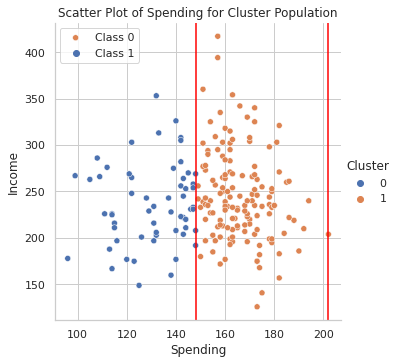

=============== Performance of Cluster ================


====== Cluster prediction 
(sepnding = 100
[0]
(sepnding = 200
[1]
====== Cluster prediction 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, tree, ensemble, cluster, metrics
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

#drive.mount("/content/drive", force_remount=True)
url='data/data_customers.xlsx'
customers_list = pd.read_excel(url, engine='openpyxl')

# creat dummy variables for sex: 1=> Male, 0=>Female
label_encoder = preprocessing.LabelEncoder()
encoded_Sex = label_encoder.fit_transform(customers_list["Gender"])
customers_list["Gender"] =  pd.DataFrame({"Gender": encoded_Sex})

# use median value to fill the data without value
income_median = np.nanmedian(customers_list["Income"])
income_median_new = np.where(customers_list["Income"].isnull(), income_median, customers_list["Income"])
customers_list["Income"] = income_median_new

Spending_median = np.nanmedian(customers_list["Spending"])
Spending_median_new = np.where(customers_list["Spending"].isnull(), Spending_median, customers_list["Spending"])
customers_list["Spending"] = Spending_median_new


# build data set
customers_list_dataset = pd.DataFrame([
             # customers_list["Gender"]
             #,customers_list["Income"]
             customers_list["Spending"]
             #,customers_list["Age"]
]).T


number_of_clusters=2 # the cluster /grouping size is 2 (one for vip, another for common customer)
kmeans_fit = cluster.KMeans(n_clusters = number_of_clusters).fit(customers_list_dataset)
#print(kmeans_fit.labels_) # show出分類
customers_list["Cluster"]= kmeans_fit.labels_


print("=============== Performance of Cluster ================\n\n")
# plot the representation of the KMeans model

print("\n # Scatter Plot of Spending for Class Population \n")
plt.figure(figsize=(15,8))
sns.relplot(x="Spending", y="Income", hue="Cluster", data=customers_list)
plt.legend(['Class 0', 'Class 1'])
plt.title('Scatter Plot of Spending for Cluster Population')

# draww separation line

separation_line=np.max((customers_list[customers_list.Cluster == 0])["Spending"].values.tolist())
plt.axvline(int(separation_line), color='red') # Plot a vertical line at corresponding x
separation_line=np.max((customers_list[customers_list.Cluster == 1])["Spending"].values.tolist())
plt.axvline(int(separation_line), color='red') # Plot a vertical line at corresponding x

plt.show(sns)

print("=============== Performance of Cluster ================\n\n")
# prediction

print("====== Cluster prediction ")
print("(sepnding = 100")
print(kmeans_fit.predict([[100]]))
print("(sepnding = 200")
print(kmeans_fit.predict([[200]]))
print("====== Cluster prediction ")

### 2.1.2. clustering for two dimensions data

=============== Performance of Cluster ================



 # Scatter Plot of Spending for Cluster Population 



<Figure size 1080x576 with 0 Axes>

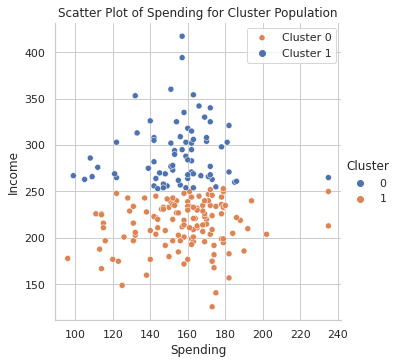

====== Cluster prediction 
(income=300, spending = 100
[0]
(income=100, spending = 300
[1]
====== classification prediction 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, tree, ensemble, cluster, metrics
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

#drive.mount("/content/drive", force_remount=True)
#url= '/content/drive/My Drive/2020_ai_course/model/Analysis_Data/customers.csv'
url='data/data_customers.xlsx'
customers_list = pd.read_excel(url, engine='openpyxl')

# creat dummy variables for sex: 1=> Male, 0=>Female
label_encoder = preprocessing.LabelEncoder()
encoded_Sex = label_encoder.fit_transform(customers_list["Gender"])
customers_list["Gender"] =  pd.DataFrame({"Gender": encoded_Sex})

# use median value to fill the data without Age value
income_median = np.nanmedian(customers_list["Income"])
income_median_new = np.where(customers_list["Income"].isnull(), income_median, customers_list["Income"])
customers_list["Income"] = income_median_new

Spending_median = np.nanmedian(customers_list["Spending"])
Spending_median_new = np.where(customers_list["Spending"].isnull(), income_median, customers_list["Spending"])
customers_list["Spending"] = Spending_median_new


# build data set
customers_list_dataset = pd.DataFrame([
             # customers_list["Gender"]
             customers_list["Income"],
             customers_list["Spending"]
             #,customers_list["Age"]
]).T

number_of_clusters=2
kmeans_fit = cluster.KMeans(n_clusters = number_of_clusters).fit(customers_list_dataset)
#print(kmeans_fit.labels_) # show出分群
customers_list["Cluster"]= kmeans_fit.labels_


print("=============== Performance of Cluster ================\n\n")
# plot the representation of the KMeans model

print("\n # Scatter Plot of Spending for Cluster Population \n")
plt.figure(figsize=(15,8))
sns.relplot(x="Spending", y="Income", hue="Cluster", data=customers_list)
plt.legend(['Cluster 0', 'Cluster 1'])
plt.title('Scatter Plot of Spending for Cluster Population')
plt.show()

# prediction

print("====== Cluster prediction ")
print("(income=300, spending = 100")
print(kmeans_fit.predict([[300,100]]))
print("(income=100, spending = 300")
print(kmeans_fit.predict([[100,300]]))
print("====== classification prediction ")

### 2.1.3. clustering for 4 dimensions data






=============== The Cluster Status of 4 Groups ================



 # Scatter Plot of Spending for Cluster Population 



<Figure size 1080x576 with 0 Axes>

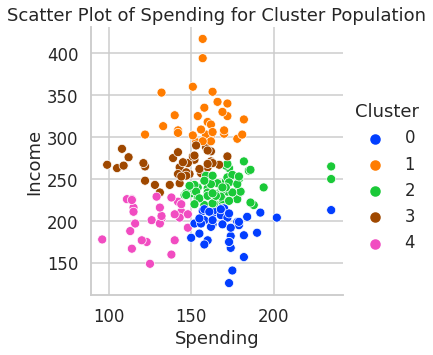

=============== The Cluster Status of 4 Groups  ================


====== Cluster prediction 
(gender=1, income=300, spending = 100, age=15
[3]
(gender=0, income=300, spending = 100, age=60
[0]
====== Cluster prediction 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, tree, ensemble, cluster, metrics
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)


#drive.mount("/content/drive", force_remount=True)
#url= '/content/drive/My Drive/2020_ai_course/model/Analysis_Data/customers.csv'
url='data/data_customers.xlsx'
customers_list = pd.read_excel(url, engine='openpyxl')

# creat dummy variables for sex: 1=> Male, 0=>Female
label_encoder = preprocessing.LabelEncoder()
encoded_Sex = label_encoder.fit_transform(customers_list["Gender"])
customers_list["Gender"] =  pd.DataFrame({"Gender": encoded_Sex})

# use median value to fill the data without Age value
income_median = np.nanmedian(customers_list["Income"])
income_median_new = np.where(customers_list["Income"].isnull(), income_median, customers_list["Income"])
customers_list["Income"] = income_median_new

Spending_median = np.nanmedian(customers_list["Spending"])
Spending_median_new = np.where(customers_list["Spending"].isnull(), income_median, customers_list["Spending"])
customers_list["Spending"] = Spending_median_new


# build data set
customers_list_dataset = pd.DataFrame([
             customers_list["Gender"],
             customers_list["Income"],
             customers_list["Spending"],
             customers_list["Age"]
]).T


print("=============== The Cluster Status of 4 Groups ================\n\n")

number_of_clusters=5
kmeans_fit = cluster.KMeans(n_clusters = number_of_clusters).fit(customers_list_dataset)
cluster_labels = kmeans_fit.labels_
customers_list["Cluster"]= kmeans_fit.labels_
print("\n # Scatter Plot of Spending for Cluster Population \n")

plt.figure(figsize=(15,8))
sns.set_context("talk")
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
#sns.palplot(sns.xkcd_palette(colors))

sns.set_palette(sns.color_palette('bright'))
sns.relplot(x="Spending", y="Income", hue="Cluster", data=customers_list,palette=["C0", "C1","C2","C5","C6"])
plt.title('Scatter Plot of Spending for Cluster Population')
plt.show()
print("=============== The Cluster Status of 4 Groups  ================\n\n")


# prediction

print("====== Cluster prediction ")
print("(gender=1, income=300, spending = 100, age=15")
print(kmeans_fit.predict([[1,300,100,15]]))
print("(gender=0, income=300, spending = 100, age=60")
print(kmeans_fit.predict([[0,100,300,60]]))
print("====== Cluster prediction ")


### 2.1.4. Exercise

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, tree, ensemble, cluster, metrics
from google.colab import drive
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)


#drive.mount("/content/drive", force_remount=True)
#url= '/content/drive/My Drive/2020_ai_course/model/Analysis_Data/customers.csv'
url='data/data_customers.xlsx'
customers_list = pd.read_excel(url, engine='openpyxl')

# creat dummy variables for sex: 1=> Male, 0=>Female
label_encoder = preprocessing.LabelEncoder()
encoded_Sex = label_encoder.fit_transform(customers_list["Gender"])
customers_list["Gender"] =  pd.DataFrame({"Gender": encoded_Sex})

# use median value to fill the data without Age value
income_median = np.nanmedian(customers_list["Income"])
income_median_new = np.where(customers_list["Income"].isnull(), income_median, customers_list["Income"])
customers_list["Income"] = income_median_new

Spending_median = np.nanmedian(customers_list["Spending"])
Spending_median_new = np.where(customers_list["Spending"].isnull(), income_median, customers_list["Spending"])
customers_list["Spending"] = Spending_median_new


# build data set
customers_list_dataset = pd.DataFrame([
             customers_list["Gender"],
             customers_list["Income"],
             customers_list["Spending"],
             customers_list["Age"]
]).T


print("=============== The Cluster Status of 4 Groups ================\n\n")

number_of_clusters=4
kmeans_fit = cluster.KMeans(n_clusters = number_of_clusters).fit(customers_list_dataset)
cluster_labels = kmeans_fit.labels_
customers_list["Cluster"]= kmeans_fit.labels_
print("\n # Scatter Plot of Spending for Cluster Population \n")

plt.figure(figsize=(15,8))
sns.set_context("talk")
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
#sns.palplot(sns.xkcd_palette(colors))

sns.set_palette(sns.color_palette('bright'))
sns.relplot(x="Spending", y="Income", hue="Cluster", data=customers_list,palette=["C0", "C1","C2","C5"])
plt.title('Scatter Plot of Spending for Cluster Population')
plt.show()
print("=============== The Cluster Status of 4 Groups  ================\n\n")


# prediction

print("====== Cluster prediction ")
print("(gender=1, income=300, spending = 100, age=15")
print(kmeans_fit.predict([[1,300,100,15]]))
print("(gender=?, income=?, spending = ?, age=?")
print(kmeans_fit.predict([[?,?,?,?]]))
print("====== Cluster prediction ")


SyntaxError: ignored

## 2.2. AffinityPropagation

AffinityPropagation does not need to specify the number of clustering

=============== The Cluster Status of Groups ================



 # Scatter Plot of Spending for Cluster Population 

 # Number of clusters:  200


<Figure size 1080x576 with 0 Axes>

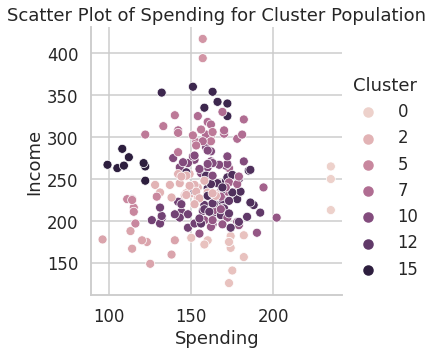

=============== The Cluster Status of Groups  ================


====== Cluster prediction 
(gender=1, income=300, spending = 100, age=15
[15]
(gender=0, income=300, spending = 100, age=60
[1]
====== Cluster prediction 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, tree, ensemble, cluster, metrics
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

url='data/data_customers.xlsx'
customers_list = pd.read_excel(url, engine='openpyxl')

# creat dummy variables for sex: 1=> Male, 0=>Female
label_encoder = preprocessing.LabelEncoder()
encoded_Sex = label_encoder.fit_transform(customers_list["Gender"])
customers_list["Gender"] =  pd.DataFrame({"Gender": encoded_Sex})

# use median value to fill the data without Age value
income_median = np.nanmedian(customers_list["Income"])
income_median_new = np.where(customers_list["Income"].isnull(), income_median, customers_list["Income"])
customers_list["Income"] = income_median_new

Spending_median = np.nanmedian(customers_list["Spending"])
Spending_median_new = np.where(customers_list["Spending"].isnull(), income_median, customers_list["Spending"])
customers_list["Spending"] = Spending_median_new


# build data set
customers_list_dataset = pd.DataFrame([
             customers_list["Gender"],
             customers_list["Income"],
             customers_list["Spending"],
             customers_list["Age"]
]).T


print("=============== The Cluster Status of Groups ================\n\n")

model = cluster.AffinityPropagation().fit(customers_list_dataset)
cluster_labels = model.labels_
customers_list["Cluster"]= model.labels_
print("\n # Scatter Plot of Spending for Cluster Population \n")


n_clusters_ = len(cluster_labels)

print(" # Number of clusters: ", n_clusters_)

plt.figure(figsize=(15,8))
sns.set_context("talk")
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
#sns.palplot(sns.xkcd_palette(colors))

sns.set_palette(sns.color_palette('bright'))
sns.relplot(x="Spending", y="Income", hue="Cluster", data=customers_list)
plt.title('Scatter Plot of Spending for Cluster Population')
plt.show()
print("=============== The Cluster Status of Groups  ================\n\n")


# prediction

print("====== Cluster prediction ")
print("(gender=1, income=300, spending = 100, age=15")
print(model.predict([[1,300,100,15]]))
print("(gender=0, income=300, spending = 100, age=60")
print(model.predict([[0,100,300,60]]))
print("====== Cluster prediction ")


## 2.3. Birch

=============== The Cluster Status of 4 Groups ================



 # Scatter Plot of Spending for Cluster Population 



<Figure size 1080x576 with 0 Axes>

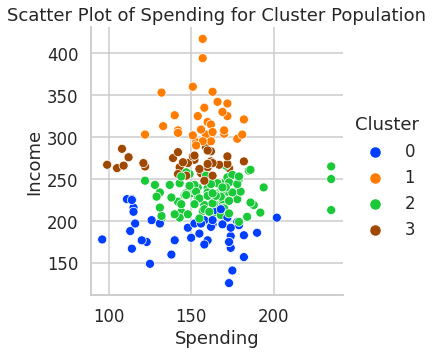

=============== The Cluster Status of 4 Groups  ================


====== Cluster prediction 
(gender=1, income=300, spending = 100, age=15
[1]
(gender=0, income=300, spending = 100, age=60
[2]
====== Cluster prediction 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Birch was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Birch was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:

import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, tree, ensemble, cluster, metrics
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)


url='data/data_customers.xlsx'
customers_list = pd.read_excel(url, engine='openpyxl')

# creat dummy variables for sex: 1=> Male, 0=>Female
label_encoder = preprocessing.LabelEncoder()
encoded_Sex = label_encoder.fit_transform(customers_list["Gender"])
customers_list["Gender"] =  pd.DataFrame({"Gender": encoded_Sex})

# use median value to fill the data without Age value
income_median = np.nanmedian(customers_list["Income"])
income_median_new = np.where(customers_list["Income"].isnull(), income_median, customers_list["Income"])
customers_list["Income"] = income_median_new

Spending_median = np.nanmedian(customers_list["Spending"])
Spending_median_new = np.where(customers_list["Spending"].isnull(), income_median, customers_list["Spending"])
customers_list["Spending"] = Spending_median_new


# build data set
customers_list_dataset = pd.DataFrame([
             customers_list["Gender"],
             customers_list["Income"],
             customers_list["Spending"],
             customers_list["Age"]
]).T


print("=============== The Cluster Status of 4 Groups ================\n\n")

model = cluster.Birch(n_clusters=4).fit(customers_list_dataset)
cluster_labels = model.labels_
customers_list["Cluster"]= model.labels_
print("\n # Scatter Plot of Spending for Cluster Population \n")

plt.figure(figsize=(15,8))
sns.set_context("talk")
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
#sns.palplot(sns.xkcd_palette(colors))

sns.set_palette(sns.color_palette('bright'))
sns.relplot(x="Spending", y="Income", hue="Cluster", data=customers_list,palette=["C0", "C1","C2","C5"])
plt.title('Scatter Plot of Spending for Cluster Population')
plt.show()
print("=============== The Cluster Status of 4 Groups  ================\n\n")


# prediction

print("====== Cluster prediction ")
print("(gender=1, income=300, spending = 100, age=15")
print(model.predict([[1,300,100,15]]))
print("(gender=0, income=300, spending = 100, age=60")
print(model.predict([[0,100,300,60]]))
print("====== Cluster prediction ")




---



# 3.Classification (30 mins)
Explore the probability of a certain class or event of only two/more choices.

E.g., pass/fail, win/lose, alive/dead or healthy/sick.

Conventional Classfication algorithms are list [here](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py)



2019高普考-資訊管理概論

http://goldensun.get.com.tw/file/Paper/KP/600.pdf

二、資料探勘（data mining）乃是由資料庫、資料倉儲或其他資料儲存設備內的大量資料中，找出隱含的、未知的、可能有用的或是有趣的樣式（pattern）之過程，重要的技術包括：關聯規則
（association  rules）、分類（classification）、分群（clustering）等。請回答下列有關資料探勘的問題：

(一)請說明「分類」與「分群」的差異。（10分）

(二)請舉例說明「分類」在政府部門的可能應用。（5分） 

(三)請舉例說明「分群」在政府部門的可能應用。（5分）

答：

(一)

分群(clustering)為將資料分群，將相同特性之資料(如產品、顧客)分成同一群；

而分類(classification)依照特定條件將資料分類，可判斷資料庫中之資料是否隱含此族群之特性。

兩者最主要之差別在於，分群並不會將使用者區分之條件事先設定(分群在訓練時不需有Y值)，而是根據演算法動態找出分群之條件；

而分類必須事先將區分條件設定(分群在訓練時需有Y值)，由演算法找出各群是否滿足欲尋求之條件(找出Y=AX+b關係式)。

(二)分類(classification)：有具體的Y的屬性(e.g., 可能犯罪/不太可能犯罪)，例如透過犯罪資料庫，找出Y=有犯罪/無犯罪，X為不同學歷、家庭狀況、年齡層、職業、收入條件下，建立好模型 Y= AX + b後，即可透過X求出潛在可能需要輔導的犯罪或詐欺行為人。

(三)分群(clustering)：沒有具體的Y的屬性(你必須根據組織的需求，告訴演算法你要分幾群)例如社會局人民團體科有三個科員，為了平均分配業務，將民眾資料區分為三個群組，政府可依照群組內相同特性提供量身訂做之服務。如民眾e管家等服務性質網站，若有新會員加入，亦可自動分入適當群組，讓三個科員各自提供其適合之服務項目。



Now, we have the [plague patient List](https://docs.google.com/spreadsheets/d/1s47oID_NkscOV1EXna24skuuhWA7OvnkFUSN3bC5caU/edit?usp=sharing). Please find the relationship betwen Survival (Y) and Age (x1), Sex (x2), and Patient Class (x3), then build a survival model to predict surviving rate by Age (x1), Sex (x2), and Passanger Class (x3).

## Logistic Regression

### sm linear model

In [ ]:
import pandas as pd
import numpy as np

import statsmodels.api as sm # other model

from sklearn import preprocessing  # encoding
from sklearn.model_selection import train_test_split #train/test
from sklearn import linear_model, svm, tree, ensemble # model

url='data/data_pandamic_list.csv'

patient_list = pd.read_csv(url)

# use median value to fill the data without Age value
age_median = np.nanmedian(patient_list["Age"])
new_Age = np.where(patient_list["Age"].isnull(), age_median, patient_list["Age"])
patient_list["Age"] = new_Age

# creat dummy variables for sex: 1=> Male, 0=>Female
label_encoder = preprocessing.LabelEncoder()
encoded_Sex = label_encoder.fit_transform(patient_list["Sex"])
encoded_Sex =  pd.DataFrame({"Sex": encoded_Sex})

# build data set
patient_dataset = pd.DataFrame([patient_list["Survived"],
                        patient_list["Pclass"],
                        encoded_Sex["Sex"],
                        patient_list["Age"]
]).T



# build model
Xcols=["Pclass", "Sex", "Age"] 
train_X=patient_dataset[Xcols]
train_X_statsmodels = sm.add_constant(train_X)
train_Y=patient_dataset['Survived']


model = sm.Logit(train_Y, train_X_statsmodels)
result = model.fit()

print("=========== model parameters")
# print a1, a2, a3 (coefficient)
print("Coefficient: ", np.array(result.params.array[1:])) # [-1.17171923 -2.61227944 -0.03331108]

# print b (interception)
print("Interception: ", np.array(result.params.array[0])) # [4.72473915580578]

# print linear model

print("========= survival model =========\n")
print("Y= {} * X1 + {} * X2 + {} * X3 + {}".format(
                               np.array(result.params.array[1])
                              ,np.array(result.params.array[2])
                              ,np.array(result.params.array[3])
                              ,np.array(result.params.array[0])
                              ))

print("\n========= survival model =========")




# prediction
# input: [[3=> 3rd class ticket , 1=> male , 40=>40 years old]]
# output: 0=> death, 1=> suviving
print("surviving rate of a 40 years old male with a 3rd-class ticket")
print("0=> death, 1=> surviving, prediction: ",end="")


print("0=> death, 1=> surviving, prediction prabibility: ",end="")
print(1-result.predict( [  [1,3,1,40]  ])) # [[0.93504419  => death 0.06495581=>survival]]


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.452069
         Iterations 6
=========== model parameters
Coefficient:  [-1.17171923 -2.61227944 -0.03331108]
Interception:  4.72473915580578
========= survival model =========

Y= -1.1717192296735337 * X1 + -2.6122794357938584 * X2 + -0.03331108306757387 * X3 + 4.72473915580578

========= survival model =========
surviving rate of a 40 years old male with a 3rd-class ticket
0=> death, 1=> surviving, prediction: 0=> death, 1=> surviving, prediction prabibility: [0.93906868]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### sklearn linear model

In [ ]:
import pandas as pd
import numpy as np

import statsmodels.api as sm # other model

from sklearn import preprocessing  # encoding
from sklearn.model_selection import train_test_split #train/test
from sklearn import linear_model, svm, tree, ensemble # model

url='data/data_pandamic_list.csv'

patient_list = pd.read_csv(url)

# use median value to fill the data without Age value
age_median=patient_list['Age'].median()
# fill the missing value
patient_list['Age'].fillna(age_median, inplace=True)

# creat dummy variables for sex: 1=> Male, 0=>Female
label_encoder = preprocessing.LabelEncoder()

patient_list["Sex"] = label_encoder.fit_transform(patient_list["Sex"])

# check missing data
print("=========== check missing data start")
print(patient_list.isnull().sum())
print("=========== check missing data end")

# build data set
patient_list = pd.DataFrame([patient_list["Survived"],
                        patient_list["Pclass"],
                        patient_list["Sex"],
                        patient_list["Age"]
]).T



# build model
Xcols=["Pclass", "Sex", "Age"] 
train_X=patient_list[Xcols]
train_Y=patient_list['Survived']

model = linear_model.LogisticRegression()
#model = tree.DecisionTreeClassifier()
#model = svm.SVC()
#model = ensemble.BaggingClassifier(n_estimators = 100)
#model = ensemble.RandomForestClassifier(n_estimators = 100)
#model = ensemble.AdaBoostClassifier(n_estimators = 100)
model.fit(train_X, train_Y)

print("=========== model parameters")
# print a1, a2, a3 (coefficient)
print("Coefficient: ", model.coef_) # [[-1.14125534 -2.519584   -0.03271785]]

# print b (interception)
print("Interception: ", model.intercept_ ) # [4.58517765]

# print linear model
print("========= survival model =========\n")
print("Y= {} * X1 + {} * X2 + {} * X3 + {}".format(model.coef_[0][0]
                              ,model.coef_[0][1]
                              ,model.coef_[0][2]
                              ,model.intercept_[0]))

print("\n========= survival model =========")




# prediction
# input: [[3=> 3rd class ticket , 1=> male , 40=>40 years old]]
# output: 0=> death, 1=> suviving
print("surviving rate of a 40 years old male with a 3rd-class ticket")
print("0=> death, 1=> surviving, prediction: ",end="")
print(model.predict([[3,1,40]]))
print("0=> death, 1=> surviving, prediction prabibility: ",end="")
print(model.predict_proba([[3,1,40]])) # [[0.93504419  => death 0.06495581=>survival]]



=========== check missing data start
ID          0
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
Fare        0
dtype: int64
=========== check missing data end
=========== model parameters
Coefficient:  [[-1.14125534 -2.519584   -0.03271785]]
Interception:  [4.58517765]
========= survival model =========

Y= -1.1412553422669531 * X1 + -2.5195839956502746 * X2 + -0.032717854374415836 * X3 + 4.585177653135471

========= survival model =========
surviving rate of a 40 years old male with a 3rd-class ticket
0=> death, 1=> surviving, prediction: [0.]
0=> death, 1=> surviving, prediction prabibility: [[0.93504419 0.06495581]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


### sklearn linear model with train/test evaluation (把資料分成訓練集跟測試集)


In [ ]:
import pandas as pd
import numpy as np

import statsmodels.api as sm # other model

from sklearn import preprocessing  # encoding
from sklearn.model_selection import train_test_split #train/test
from sklearn import linear_model, svm, tree, ensemble # model

url='data/data_pandamic_list.csv'

patient_list = pd.read_csv(url)

# use median value to fill the data without Age value
age_median=patient_list['Age'].median()
# fill the missing value
patient_list['Age'].fillna(age_median, inplace=True)

# creat dummy variables for sex: 1=> Male, 0=>Female
label_encoder = preprocessing.LabelEncoder()

patient_list["Sex"] = label_encoder.fit_transform(patient_list["Sex"])

# check missing data
print("=========== check missing data start")
print(patient_list.isnull().sum())
print("=========== check missing data end")

# build data set
patient_list = pd.DataFrame([patient_list["Survived"],
                        patient_list["Pclass"],
                        patient_list["Sex"],
                        patient_list["Age"]
]).T

# Using 80-20 Split for Cross Validation 
train, test = train_test_split(patient_list, test_size=0.2)

# build model
Xcols=["Pclass", "Sex", "Age"] 
train_X=train[Xcols]
train_Y=train['Survived']



model = linear_model.LogisticRegression()
#model = tree.DecisionTreeClassifier()
#model = svm.SVC()
#model = ensemble.BaggingClassifier(n_estimators = 100)
#model = ensemble.RandomForestClassifier(n_estimators = 100)
#model = ensemble.AdaBoostClassifier(n_estimators = 100)
model.fit(train_X, train_Y)

print( "\n Sufficient of this model (mean accuracy): ", end="")
test_X=test[Xcols]
test_Y=test['Survived']
print( model.score(test_X, test_Y))

print("\n\n ============= prediction =============")

# prediction
# input: [[3=> 3rd class ticket , 1=> male , 40=>40 years old]]
# output: 0=> death, 1=> suviving
print("surviving rate of a 40 years old male with a 3rd-class ticket")
print("0=> death, 1=> surviving, prediction: ",end="")
print(model.predict([[3,1,50]]))
print("0=> death, 1=> surviving, prediction prabibility: ",end="")
print(model.predict_proba([[3,1,50]])) 



=========== check missing data start
ID          0
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
Fare        0
dtype: int64
=========== check missing data end

 Sufficient of this model (mean accuracy): 0.7597765363128491


 ============= prediction =============
surviving rate of a 40 years old male with a 3rd-class ticket
0=> death, 1=> surviving, prediction: [0.]
0=> death, 1=> surviving, prediction prabibility: [[0.96400898 0.03599102]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


## Decision Tree

In [ ]:
import pandas as pd
import numpy as np

import statsmodels.api as sm # other model

from sklearn import preprocessing  # encoding
from sklearn.model_selection import train_test_split #train/test
from sklearn import linear_model, svm, tree, ensemble # model

#drive.mount("/content/drive", force_remount=True)
#url= '/content/drive/My Drive/2020_ai_course/model/Analysis_Data/titanic_list.csv'
url='data/data_pandamic_list.csv'

patient_list = pd.read_csv(url)

# use median value to fill the data without Age value
age_median=patient_list['Age'].median()
# fill the missing value
patient_list['Age'].fillna(age_median, inplace=True)

# creat dummy variables for sex: 1=> Male, 0=>Female
label_encoder = preprocessing.LabelEncoder()

patient_list["Sex"] = label_encoder.fit_transform(patient_list["Sex"])

# check missing data
print("=========== check missing data start")
print(patient_list.isnull().sum())
print("=========== check missing data end")

# build data set
patient_list = pd.DataFrame([patient_list["Survived"],
                        patient_list["Pclass"],
                        patient_list["Sex"],
                        patient_list["Age"]
]).T


# Using 80-20 Split for Cross Validation 
train, test = train_test_split(patient_list, test_size=0.2)

# build model
Xcols=["Pclass", "Sex", "Age"] 
train_X=train[Xcols]
train_Y=train['Survived']


#model = linear_model.LogisticRegression()
model = tree.DecisionTreeClassifier()
#model = svm.SVC()
#model = ensemble.BaggingClassifier(n_estimators = 100)
#model = ensemble.RandomForestClassifier(n_estimators = 100)
#model = ensemble.AdaBoostClassifier(n_estimators = 100)
model.fit(train_X, train_Y)

print( "\n Sufficient of this model (mean accuracy): ", end="")
test_X=test[Xcols]
test_Y=test['Survived']
print( model.score(test_X, test_Y))

print("\n\n ============= prediction =============")

# prediction
# input: [[3=> 3rd class ticket , 1=> male , 40=>40 years old]]
# output: 0=> death, 1=> suviving
print("surviving rate of a 40 years old male with a 3rd-class ticket")
print("0=> death, 1=> surviving, prediction: ",end="")
print(model.predict([[3,1,50]]))
print("0=> death, 1=> surviving, prediction prabibility: ",end="")
print(model.predict_proba([[3,1,50]])) 



=========== check missing data start
ID          0
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
Fare        0
dtype: int64
=========== check missing data end

 Sufficient of this model (mean accuracy): 0.8491620111731844


 ============= prediction =============
surviving rate of a 40 years old male with a 3rd-class ticket
0=> death, 1=> surviving, prediction: [0.]
0=> death, 1=> surviving, prediction prabibility: [[1. 0.]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


## SVM

In [ ]:
import pandas as pd
import numpy as np

import statsmodels.api as sm # other model

from sklearn import preprocessing  # encoding
from sklearn.model_selection import train_test_split #train/test
from sklearn import linear_model, svm, tree, ensemble # model

#drive.mount("/content/drive", force_remount=True)
#url= '/content/drive/My Drive/2020_ai_course/model/Analysis_Data/titanic_list.csv'
url='data/data_pandamic_list.csv'

patient_list = pd.read_csv(url)

# use median value to fill the data without Age value
age_median=patient_list['Age'].median()
# fill the missing value
patient_list['Age'].fillna(age_median, inplace=True)

# creat dummy variables for sex: 1=> Male, 0=>Female
label_encoder = preprocessing.LabelEncoder()

patient_list["Sex"] = label_encoder.fit_transform(patient_list["Sex"])

# check missing data
print("=========== check missing data start")
print(patient_list.isnull().sum())
print("=========== check missing data end")

# build data set
patient_list = pd.DataFrame([patient_list["Survived"],
                        patient_list["Pclass"],
                        patient_list["Sex"],
                        patient_list["Age"]
]).T


# Using 80-20 Split for Cross Validation 
train, test = train_test_split(patient_list, test_size=0.2)

# build model
Xcols=["Pclass", "Sex", "Age"] 
train_X=train[Xcols]
train_Y=train['Survived']


#model = linear_model.LogisticRegression()
#model = tree.DecisionTreeClassifier()
model = svm.SVC()
#model = ensemble.BaggingClassifier(n_estimators = 100)
#model = ensemble.RandomForestClassifier(n_estimators = 100)
#model = ensemble.AdaBoostClassifier(n_estimators = 100)
model.fit(train_X, train_Y)

print( "\n Sufficient of this model (mean accuracy): ", end="")
test_X=test[Xcols]
test_Y=test['Survived']
print( model.score(test_X, test_Y))

print("\n\n ============= prediction =============")

# prediction
# input: [[3=> 3rd class ticket , 1=> male , 40=>40 years old]]
# output: 0=> death, 1=> suviving
print("surviving rate of a 40 years old male with a 3rd-class ticket")
print("0=> death, 1=> surviving, prediction: ",end="")
print(model.predict([[3,1,50]]))



=========== check missing data start
ID          0
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
Fare        0
dtype: int64
=========== check missing data end

 Sufficient of this model (mean accuracy): 0.6145251396648045


 ============= prediction =============
surviving rate of a 40 years old male with a 3rd-class ticket
0=> death, 1=> surviving, prediction: [0.]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


## Bagging

In [ ]:
import pandas as pd
import numpy as np

import statsmodels.api as sm # other model

from sklearn import preprocessing  # encoding
from sklearn.model_selection import train_test_split #train/test
from sklearn import linear_model, svm, tree, ensemble # model

#drive.mount("/content/drive", force_remount=True)
#url= '/content/drive/My Drive/2020_ai_course/model/Analysis_Data/titanic_list.csv'
url='data/data_pandamic_list.csv'

patient_list = pd.read_csv(url)

# use median value to fill the data without Age value
age_median=patient_list['Age'].median()
# fill the missing value
patient_list['Age'].fillna(age_median, inplace=True)

# creat dummy variables for sex: 1=> Male, 0=>Female
label_encoder = preprocessing.LabelEncoder()

patient_list["Sex"] = label_encoder.fit_transform(patient_list["Sex"])

# check missing data
print("=========== check missing data start")
print(patient_list.isnull().sum())
print("=========== check missing data end")

# build data set
patient_list = pd.DataFrame([patient_list["Survived"],
                        patient_list["Pclass"],
                        patient_list["Sex"],
                        patient_list["Age"]
]).T


# Using 80-20 Split for Cross Validation 
train, test = train_test_split(patient_list, test_size=0.2)

# build model
Xcols=["Pclass", "Sex", "Age"] 
train_X=train[Xcols]
train_Y=train['Survived']


#model = linear_model.LogisticRegression()
#model = tree.DecisionTreeClassifier()
#model = svm.SVC()
model = ensemble.BaggingClassifier(n_estimators = 100)
#model = ensemble.RandomForestClassifier(n_estimators = 100)
#model = ensemble.AdaBoostClassifier(n_estimators = 100)
model.fit(train_X, train_Y)

print( "\n Sufficient of this model (mean accuracy): ", end="")
test_X=test[Xcols]
test_Y=test['Survived']
print( model.score(test_X, test_Y))

print("\n\n ============= prediction =============")

# prediction
# input: [[3=> 3rd class ticket , 1=> male , 40=>40 years old]]
# output: 0=> death, 1=> suviving
print("surviving rate of a 40 years old male with a 3rd-class ticket")
print("0=> death, 1=> surviving, prediction: ",end="")
print(model.predict([[3,1,50]]))
print("0=> death, 1=> surviving, prediction prabibility: ",end="")
print(model.predict_proba([[3,1,50]])) 



=========== check missing data start
ID          0
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
Fare        0
dtype: int64
=========== check missing data end

 Sufficient of this model (mean accuracy): 0.7932960893854749


 ============= prediction =============
surviving rate of a 40 years old male with a 3rd-class ticket
0=> death, 1=> surviving, prediction: [0.]
0=> death, 1=> surviving, prediction prabibility: [[1. 0.]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  "X does not have valid feature names, but"


## Random Forest

In [ ]:
import pandas as pd
import numpy as np

import statsmodels.api as sm # other model

from sklearn import preprocessing  # encoding
from sklearn.model_selection import train_test_split #train/test
from sklearn import linear_model, svm, tree, ensemble # model

#drive.mount("/content/drive", force_remount=True)
#url= '/content/drive/My Drive/2020_ai_course/model/Analysis_Data/titanic_list.csv'
url='data/data_pandamic_list.csv'

patient_list = pd.read_csv(url)

# use median value to fill the data without Age value
age_median=patient_list['Age'].median()
# fill the missing value
patient_list['Age'].fillna(age_median, inplace=True)

# creat dummy variables for sex: 1=> Male, 0=>Female
label_encoder = preprocessing.LabelEncoder()

patient_list["Sex"] = label_encoder.fit_transform(patient_list["Sex"])

# check missing data
print("=========== check missing data start")
print(patient_list.isnull().sum())
print("=========== check missing data end")

# build data set
patient_list = pd.DataFrame([patient_list["Survived"],
                        patient_list["Pclass"],
                        patient_list["Sex"],
                        patient_list["Age"]
]).T


# Using 80-20 Split for Cross Validation 
train, test = train_test_split(patient_list, test_size=0.2)

# build model
Xcols=["Pclass", "Sex", "Age"] 
train_X=train[Xcols]
train_Y=train['Survived']


#model = linear_model.LogisticRegression()
#model = tree.DecisionTreeClassifier()
#model = svm.SVC()
#model = ensemble.BaggingClassifier(n_estimators = 100)
model = ensemble.RandomForestClassifier(n_estimators = 100)
#model = ensemble.AdaBoostClassifier(n_estimators = 100)
model.fit(train_X, train_Y)

print( "\n Sufficient of this model (mean accuracy): ", end="")
test_X=test[Xcols]
test_Y=test['Survived']
print( model.score(test_X, test_Y))

print("\n\n ============= prediction =============")

# prediction
# input: [[3=> 3rd class ticket , 1=> male , 40=>40 years old]]
# output: 0=> death, 1=> suviving
print("surviving rate of a 40 years old male with a 3rd-class ticket")
print("0=> death, 1=> surviving, prediction: ",end="")
print(model.predict([[3,1,50]]))
print("0=> death, 1=> surviving, prediction prabibility: ",end="")
print(model.predict_proba([[3,1,50]])) 



=========== check missing data start
ID          0
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
Fare        0
dtype: int64
=========== check missing data end

 Sufficient of this model (mean accuracy): 0.7653631284916201


 ============= prediction =============
surviving rate of a 40 years old male with a 3rd-class ticket
0=> death, 1=> surviving, prediction: [0.]
0=> death, 1=> surviving, prediction prabibility: [[1. 0.]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


## Adaboost

In [ ]:
import pandas as pd
import numpy as np

import statsmodels.api as sm # other model

from sklearn import preprocessing  # encoding
from sklearn.model_selection import train_test_split #train/test
from sklearn import linear_model, svm, tree, ensemble # model

#drive.mount("/content/drive", force_remount=True)
#url= '/content/drive/My Drive/2020_ai_course/model/Analysis_Data/titanic_list.csv'
url='data/data_pandamic_list.csv'

patient_list = pd.read_csv(url)

# use median value to fill the data without Age value
age_median=patient_list['Age'].median()
# fill the missing value
patient_list['Age'].fillna(age_median, inplace=True)

# creat dummy variables for sex: 1=> Male, 0=>Female
label_encoder = preprocessing.LabelEncoder()

patient_list["Sex"] = label_encoder.fit_transform(patient_list["Sex"])

# check missing data
print("=========== check missing data start")
print(patient_list.isnull().sum())
print("=========== check missing data end")

# build data set
patient_list = pd.DataFrame([patient_list["Survived"],
                        patient_list["Pclass"],
                        patient_list["Sex"],
                        patient_list["Age"]
]).T


# Using 80-20 Split for Cross Validation 
train, test = train_test_split(patient_list, test_size=0.2)

# build model
Xcols=["Pclass", "Sex", "Age"] 
train_X=train[Xcols]
train_Y=train['Survived']


#model = linear_model.LogisticRegression()
#model = tree.DecisionTreeClassifier()
#model = svm.SVC()
#model = ensemble.BaggingClassifier(n_estimators = 100)
#model = ensemble.RandomForestClassifier(n_estimators = 100)
model = ensemble.AdaBoostClassifier(n_estimators = 100)
model.fit(train_X, train_Y)

print( "\n Sufficient of this model (mean accuracy): ", end="")
test_X=test[Xcols]
test_Y=test['Survived']
print( model.score(test_X, test_Y))

print("\n\n ============= prediction =============")

# prediction
# input: [[3=> 3rd class ticket , 1=> male , 40=>40 years old]]
# output: 0=> death, 1=> suviving
print("surviving rate of a 40 years old male with a 3rd-class ticket")
print("0=> death, 1=> surviving, prediction: ",end="")
print(model.predict([[3,1,50]]))
print("0=> death, 1=> surviving, prediction prabibility: ",end="")
print(model.predict_proba([[3,1,50]])) 



=========== check missing data start
ID          0
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
Fare        0
dtype: int64
=========== check missing data end

 Sufficient of this model (mean accuracy): 0.776536312849162


 ============= prediction =============
surviving rate of a 40 years old male with a 3rd-class ticket
0=> death, 1=> surviving, prediction: [0.]
0=> death, 1=> surviving, prediction prabibility: [[0.50716598 0.49283402]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


## Exercise

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model

from sklearn.model_selection import train_test_split


#drive.mount("/content/drive", force_remount=True)
#url= '/content/drive/My Drive/2020_ai_course/model/Analysis_Data/titanic_list.csv'
url='data/data_pandamic_list.csv'

patient_list = pd.read_csv(url)

# use median value to fill the data without Age value
age_median=patient_list['Age'].median()
# fill the missing value
patient_list['Age'].fillna(age_median, inplace=True)

# creat dummy variables for sex: 1=> Male, 0=>Female
label_encoder = preprocessing.LabelEncoder()

patient_list["Sex"] = label_encoder.fit_transform(patient_list["Sex"])

# check missing data
print("=========== check missing data start")
print(patient_list.isnull().sum())
print("=========== check missing data end")

# build data set
patient_list = pd.DataFrame([patient_list["Survived"],
                        patient_list["Pclass"],
                        patient_list["Sex"],
                        patient_list["Age"],
                        patient_list["Fare"],
]).T

# Using 80-20 Split for Cross Validation 
train, test = train_test_split(patient_list, test_size=0.2)

# build model
Xcols=["Pclass", "Sex", "Age", "???"] 
train_X=patient_list[Xcols]
train_Y=patient_list['Survived']

logistic_regr = linear_model.LogisticRegression()
logistic_regr.fit(train_X, train_Y)

print("=========== model parameters")

# print a1, a2, a3 (coefficient)
print("Coefficient: ", logistic_regr.coef_) # [[-0.98136537 -2.40629309 -0.023991  ]]

# print b (interception)
print("Interception: ", logistic_regr.intercept_ ) # [3.88051905]

# print linear model
print("========= survival model =========\n")
print("Y= {} * X1 + {} * X2 + {} * X3  + {} * X4 + {}".format(logistic_regr.coef_[0][0]
                              ,logistic_regr.coef_[0][1]
                              ,logistic_regr.coef_[0][2]
                              ,logistic_regr.coef_[0][3]
                              ,logistic_regr.intercept_[0]))

print("\n========= survival model =========")

# prediction
# input: [[3=> 3rd class ticket , 1=> male , 40=>40 years old]]
# output: 0=> death, 1=> suviving
print("surviving rate of a 40 years old male with a 3rd-class ticket with fare 3.3 ")
print("0=> death, 1=> surviving, prediction: ",end="")
print(logistic_regr.predict([[3,1,40,3.3]]))
print("0=> death, 1=> surviving, prediction prabibility: ",end="")
print(logistic_regr.predict_proba([[3,1,40,3.3]])) # [[0.93498058 0.06501942]]



=========== check missing data start
ID          0
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
Fare        0
dtype: int64
=========== check missing data end


KeyError: ignored

# 解答

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model

from sklearn.model_selection import train_test_split


#drive.mount("/content/drive", force_remount=True)
#url= '/content/drive/My Drive/2020_ai_course/model/Analysis_Data/titanic_list.csv'
url='data/data_pandamic_list.csv'

patient_list = pd.read_csv(url)

# use median value to fill the data without Age value
age_median=patient_list['Age'].median()
# fill the missing value
patient_list['Age'].fillna(age_median, inplace=True)

# creat dummy variables for sex: 1=> Male, 0=>Female
label_encoder = preprocessing.LabelEncoder()

patient_list["Sex"] = label_encoder.fit_transform(patient_list["Sex"])

# check missing data
print("=========== check missing data start")
print(patient_list.isnull().sum())
print("=========== check missing data end")

# build data set
patient_list = pd.DataFrame([patient_list["Survived"],
                        patient_list["Pclass"],
                        patient_list["Sex"],
                        patient_list["Age"],
                        patient_list["Fare"],
]).T

# Using 80-20 Split for Cross Validation 
train, test = train_test_split(patient_list, test_size=0.2)

# build model
Xcols=["Pclass", "Sex", "Age", "Fare"] 
train_X=patient_list[Xcols]
train_Y=patient_list['Survived']

logistic_regr = linear_model.LogisticRegression()
logistic_regr.fit(train_X, train_Y)

print("=========== model parameters")

# print a1, a2, a3 (coefficient)
print("Coefficient: ", logistic_regr.coef_) # [[-0.98136537 -2.40629309 -0.023991  ]]

# print b (interception)
print("Interception: ", logistic_regr.intercept_ ) # [3.88051905]

# print linear model
print("========= survival model =========\n")
print("Y= {} * X1 + {} * X2 + {} * X3  + {} * X4 + {}".format(logistic_regr.coef_[0][0]
                              ,logistic_regr.coef_[0][1]
                              ,logistic_regr.coef_[0][2]
                              ,logistic_regr.coef_[0][3]
                              ,logistic_regr.intercept_[0]))

print("\n========= survival model =========")

# prediction
# input: [[1=> 1rd class ticket , 1=> male , 45=>45 years old, 80=>80 for medication]]
# output: 0=> death, 1=> suviving
print("surviving rate of a 45 years old male with a 1rd-class ticket with fare 80 ")
print("0=> death, 1=> surviving, prediction: ",end="")
print(logistic_regr.predict([[1,1,45,80]]))
print("0=> death, 1=> surviving, prediction prabibility: ",end="")
print(logistic_regr.predict_proba([[1,1,45,80]])) # [[0.93498058 0.06501942]]



=========== check missing data start
ID          0
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
Fare        0
dtype: int64
=========== check missing data end
=========== model parameters
Coefficient:  [[-1.11562224e+00 -2.51312957e+00 -3.24714290e-02  8.19400159e-04]]
Interception:  [4.49055548]
========= survival model =========

Y= -1.1156222402059754 * X1 + -2.5131295736469 * X2 + -0.03247142897674275 * X3  + 0.0008194001587336907 * X4 + 4.490555476698595

========= survival model =========
surviving rate of a 45 years old male with a 1rd-class ticket with fare 80 
0=> death, 1=> surviving, prediction: [0.]
0=> death, 1=> surviving, prediction prabibility: [[0.63038263 0.36961737]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"




---

